### Relationship between US ISM Manufacturing Purchasing Manager Index (PMI), US recessions and annual rolling returns on the SPX Stock Market Index 

Data Source: YCharts, NBER, US Federal Reserve

#### Import Libraries

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd

import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
from matplotlib.dates import DateFormatter
from matplotlib import ticker
%matplotlib inline
import seaborn as sns # Plotting
import mplfinance as mpf # Matplotlib finance

import datetime as dt # For defining dates
import time
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#### Get dataframe from CSV, save dataframe to CSV

In [31]:
PATH = (r"C:/Users/User/Documents/Chartbook/PMI's/")
def get_df_from_csv(data_source):
    try:
        df = pd.read_csv(PATH + data_source + ".csv") # index_col='Date', parse_dates=True
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [3]:
def save_df_to_csv(df, ticker):
    df.to_csv(PATH + ticker + ".csv")

#### Get data for US ISM Manufacturing PMI and Daily Prices for the SPX Index

ISM PMI is a monthly data series.

In [4]:
# get ISM PMI in dataframe. set 'Date' to pandas.datetime
PMI = get_df_from_csv('US ISM Manufacturing (YCharts)')
PMI['Date'] = pd.to_datetime(PMI.Date)
PMI

,Date,Value
0,2023-01-31,47.4
1,2022-12-31,48.4
2,2022-11-30,49.0
3,2022-10-31,50.2
4,2022-09-30,50.9
...,...,...
645,1969-04-30,55.2
646,1969-03-31,57.1
647,1969-02-28,57.0
648,1969-01-31,54.9


In [25]:
# get SPX historical Close Prices
SPX = get_df_from_csv('SPX Historical Daily Prices')
SPX

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1968-01-02 00:00:00-05:00,0.000000,97.330002,95.309998,96.110001,11080000,0.0,0.0
1,1968-01-03 00:00:00-05:00,0.000000,96.949997,95.040001,95.669998,12650000,0.0,0.0
2,1968-01-04 00:00:00-05:00,0.000000,96.230003,94.309998,95.360001,13440000,0.0,0.0
3,1968-01-05 00:00:00-05:00,0.000000,96.660004,94.970001,95.940002,11880000,0.0,0.0
4,1968-01-08 00:00:00-05:00,0.000000,97.400002,95.540001,96.620003,14260000,0.0,0.0
...,...,...,...,...,...,...,...,...
13868,2023-02-06 00:00:00-05:00,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,0.0,0.0
13869,2023-02-07 00:00:00-05:00,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,0.0,0.0
13870,2023-02-08 00:00:00-05:00,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,0.0,0.0
13871,2023-02-09 00:00:00-05:00,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,0.0,0.0


#### Clean Data and Calculate annual returns (3 month rolling) for the SPX Stock Market Index

In [26]:
SPX['Date'] = pd.to_datetime(SPX.Date, utc=True, format = '%Y-%m-%d') # 'Date' to pandas.datetime
SPX.sort_values(by='Date', ascending=False, inplace=True) # sort dates descending
SPX['Date'] = SPX['Date'].dt.date # keep only dates. remove remaining timestamp data (hours, minutes etc.)
SPX['Date'] = pd.to_datetime(SPX.Date, format = '%Y-%m-%d') # 'Date' to pandas.datetime

In [27]:
SPX.set_index('Date', inplace=True) # set 'Date' column as index
SPX # return dataframe

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-10,4068.919922,4094.360107,4060.790039,4090.459961,3891520000,0.0,0.0
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,0.0,0.0
2023-02-08,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,0.0,0.0
2023-02-07,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,0.0,0.0
2023-02-06,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,0.0,0.0
...,...,...,...,...,...,...,...
1968-01-08,0.000000,97.400002,95.540001,96.620003,14260000,0.0,0.0
1968-01-05,0.000000,96.660004,94.970001,95.940002,11880000,0.0,0.0
1968-01-04,0.000000,96.230003,94.309998,95.360001,13440000,0.0,0.0


In [35]:
# start and end dates for the SPX rate of return calculation
start_date =  dt.datetime(1969,1,2) 
end_date = dt.datetime(2023,2,10) 

In [36]:
# get number of periods used in for loop in "get_Returns" function bellow (period: year, quarter, month)
no_periods = (relativedelta(end_date, start_date).years) * 4
no_periods

216

In [37]:
# get the first valid/available business day (descending direction) if the past date is a weekend 
def nearest_date(date_range, reference_date):
    # get previous days before the reference date 
    # reference date is past date that lands on a weekend
    prevDate = date_range[date_range < reference_date]
    # return the last date of the date range prior to reference date
    return prevDate[0]

In [43]:
# calculate historical returns function
# function input: "period" ('M' month, 'Y' year)
# function input: "number" is number of periods
def get_Returns(df, period, number, end_date): 
    # get all business days in df data range 
    df2 = df.reset_index()
    existingDates = df2['Date'].unique() 
    
    # get the first past date (end date - period offset) on years or some other period (month, week)
    if period == 'Y':
        past_date = (pd.to_datetime(end_date) - pd.DateOffset(years=number)) 
    elif period == 'M':
        past_date = (pd.to_datetime(end_date) - pd.DateOffset(months=number))  
    elif period == 'W':
        past_date = (pd.to_datetime(end_date) - pd.DateOffset(weeks=number))
    elif period == 'D':
        past_date = (pd.to_datetime(end_date) - pd.DateOffset(days=number))
       
    dates = [] # list of valid dates for rate of return calculation
    returns = [] # list of period returns
    end_date = pd.to_datetime(end_date)
    
    # check if end_date (E) and/or past_date (P) were valid business days 
    # check 4 conditions: E and P valid, E valid/P not, P valid/E not, both P&E not valid
    # if not, get closest business days (descending direction)
    # then, return the price change ([end.price / start.price] - 1) * 100

    for period in range(no_periods):
        
        try:
                
            if end_date in existingDates and past_date in existingDates: # existingDates: all business days 
                dates.append(end_date)
                end_price, start_price = df.loc[end_date].Close, df.loc[past_date].Close 
                returns.append((end_price / start_price - 1) * 100)

            elif end_date in existingDates and past_date not in existingDates:
                closestDate = nearest_date(existingDates, past_date)
                end_price, start_price = df.loc[end_date].Close, df.loc[closestDate].Close 
                returns.append((end_price / start_price - 1) * 100)
                past_date = closestDate
                dates.append(end_date)

            elif end_date not in existingDates and past_date in existingDates:
                edate = nearest_date(existingDates, end_date) 
                end_price, start_price = df.loc[edate].Close, df.loc[past_date].Close 
                returns.append((end_price / start_price - 1) * 100)
                end_date = edate
                dates.append(end_date)

            elif end_date not in existingDates and past_date not in existingDates:
                closestDate = nearest_date(existingDates, past_date)
                edate = nearest_date(existingDates, end_date) 
                end_price, start_price = df.loc[edate].Close, df.loc[closestDate].Close 
                returns.append((end_price / start_price - 1) * 100)
                end_date = edate
                past_date = closestDate
                dates.append(end_date)
                
            # update before next loop
            end_date = (pd.to_datetime(end_date) - pd.DateOffset(months=3)) 
            past_date = (pd.to_datetime(past_date) - pd.DateOffset(months=3))
 
        except IndexError:
            print("Index error")
            
    returns_df = pd.DataFrame(
    data=returns,
    index=pd.DatetimeIndex(dates, name='Date'),
    columns=['Return(%)'])
    
    return returns_df   

In [40]:
# run function to get annual SPX returns (3M rolling)
spx_returns = get_Returns(SPX, 'Y', 1, end_date)  
spx_returns

,Return(%)
Date,
2023-02-10,-9.183232
2022-11-10,-14.856530
2022-08-10,-5.105308
2022-05-10,-4.473756
2022-02-10,15.197403
...,...
1970-03-24,-11.577886
1969-12-24,-13.194974
1969-09-24,-6.911002


In [42]:
# save results to csv
save_df_to_csv(spx_returns, 'spx_annual_ror_3Mrolling')

In [5]:
# get returns from csv and set 'Date' to pandas.datetime
SPX1 = get_df_from_csv('spx_annual_ror_3Mrolling')
SPX1['Date'] = pd.to_datetime(SPX1.Date)
SPX1

,Date,Return(%)
0,2023-02-10,-9.183232
1,2022-11-10,-14.856530
2,2022-08-10,-5.105308
3,2022-05-10,-4.473756
4,2022-02-10,15.197403
...,...,...
211,1970-03-24,-11.577886
212,1969-12-24,-13.194974
213,1969-09-24,-6.911002
214,1969-06-24,-3.058073


#### Plot ISM Manufacturing PMI against 3 month rolling annual change in the SPX Index

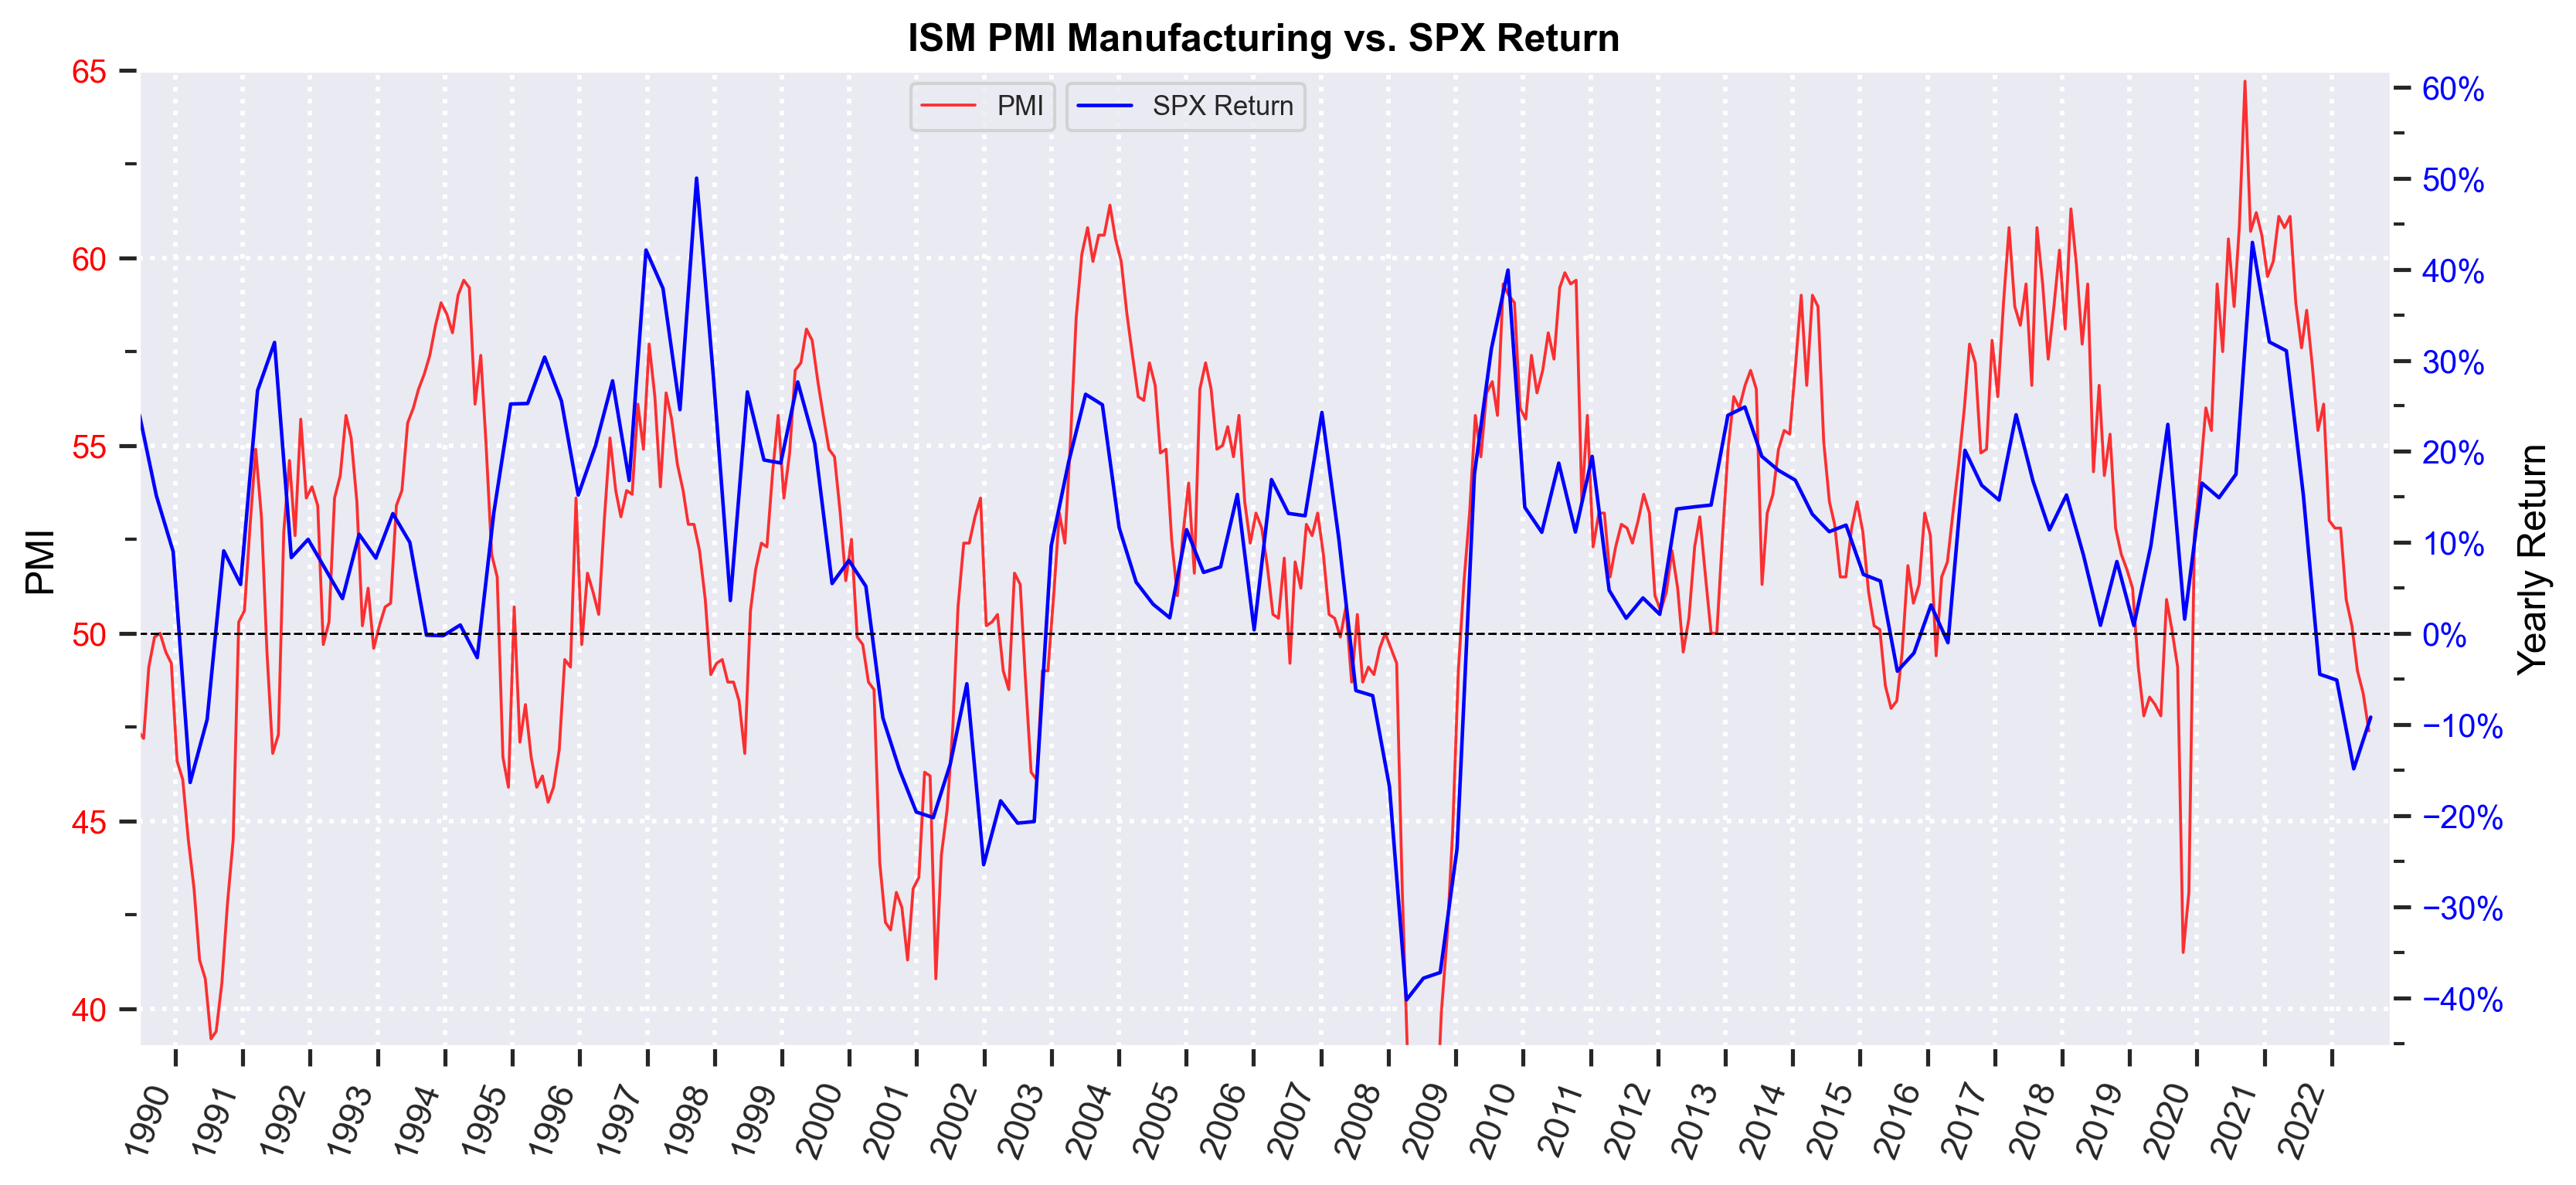

In [20]:
# Create the plot figure
fig, ax1 = plt.subplots(figsize = (11, 5), dpi=300)
plt.rcParams['figure.constrained_layout.use'] = True # automatically adjusts and fit layout 
#plt.margins(0, 0.05) # manually fit x and y series inside plot area, or use autoscaling bellow. 
plt.autoscale(enable=None, axis="x", tight=True)

sns.set_theme(style = "darkgrid", font='sans-serif') # setting grid style with seaborn

font = {'family': 'sans-serif',
        'name': 'arial',
        'color': 'black',
        'weight': 'normal',
        'size': 12,
        }

# Plot the PMI values on the left y-axis
color = 'red'
ax1.set_ylabel('PMI', color='black', fontdict = font)
ax1.plot(PMI['Date'], PMI['Value'], c='red', lw=0.9, alpha=0.8) # plot data
ax1.set_xlim([dt.datetime(1989, 12, 31), dt.datetime(2023, 6, 1)]) # set x-axis view range 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format x-axis dates (%d-%m-%Y)
ax1.xaxis.set_ticks_position('bottom') # x-axis tick positions
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=365)) # x-axis tick label interval
# rotate and right-align x-axis labels so they don't crowd each other. which = major (select major ticks)
for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=70, horizontalalignment='right')
ax1.grid(linestyle=':', linewidth=1.4) # style grid

# set params for left y-axis
ax1.set_ylim(39, 65) # set y-axis view range
ax1.tick_params(axis='y', labelcolor=color, labelsize='small') # format tick style
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5)) # major tick position
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5)) # minor tick position
ax1.yaxis.set_ticks_position('left') # tick placement
# bbox_to_anchor : specific position of the legend (x, y, width, height)
ax1.legend(['PMI'], loc='upper center', fontsize='x-small', bbox_to_anchor=(0.3750, 0, 0, 1))

# Create a twin y-axis for the SPX return values on the right side
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Yearly Return', color='black', fontdict = font) # x-label already set with ax1
ax2.plot(SPX1.Date, SPX1['Return(%)'], color=color, lw=1.1, alpha=1) # plot series
ax2.yaxis.grid(False) # remove second grid 

# set params for second/right y-axis
ax2.tick_params(axis='y', labelcolor=color, labelsize='small') # format tick style
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10)) # major tick position
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5)) # minor tick position
ax2.yaxis.set_ticks_position('right') # tick placement
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100)) # format label as percentage
ax2.legend(['SPX Return'], loc='upper center', fontsize='x-small', bbox_to_anchor=(0.465, 0, 0, 1))
ax2.axhline(y = 0, color = 'black', lw=0.7, linestyle = '--') # add zero line

plt.title("ISM PMI Manufacturing vs. SPX Return", loc='center', fontdict=font, weight='bold')

# show the plot
plt.show();


#### Plot US recessions and the ISM Manufacturing PMI

ISM Manufacturing with a sub 50 reading signals a contraction in manufacturing activity. Readings under 47/45 historically signal start of recessions.   

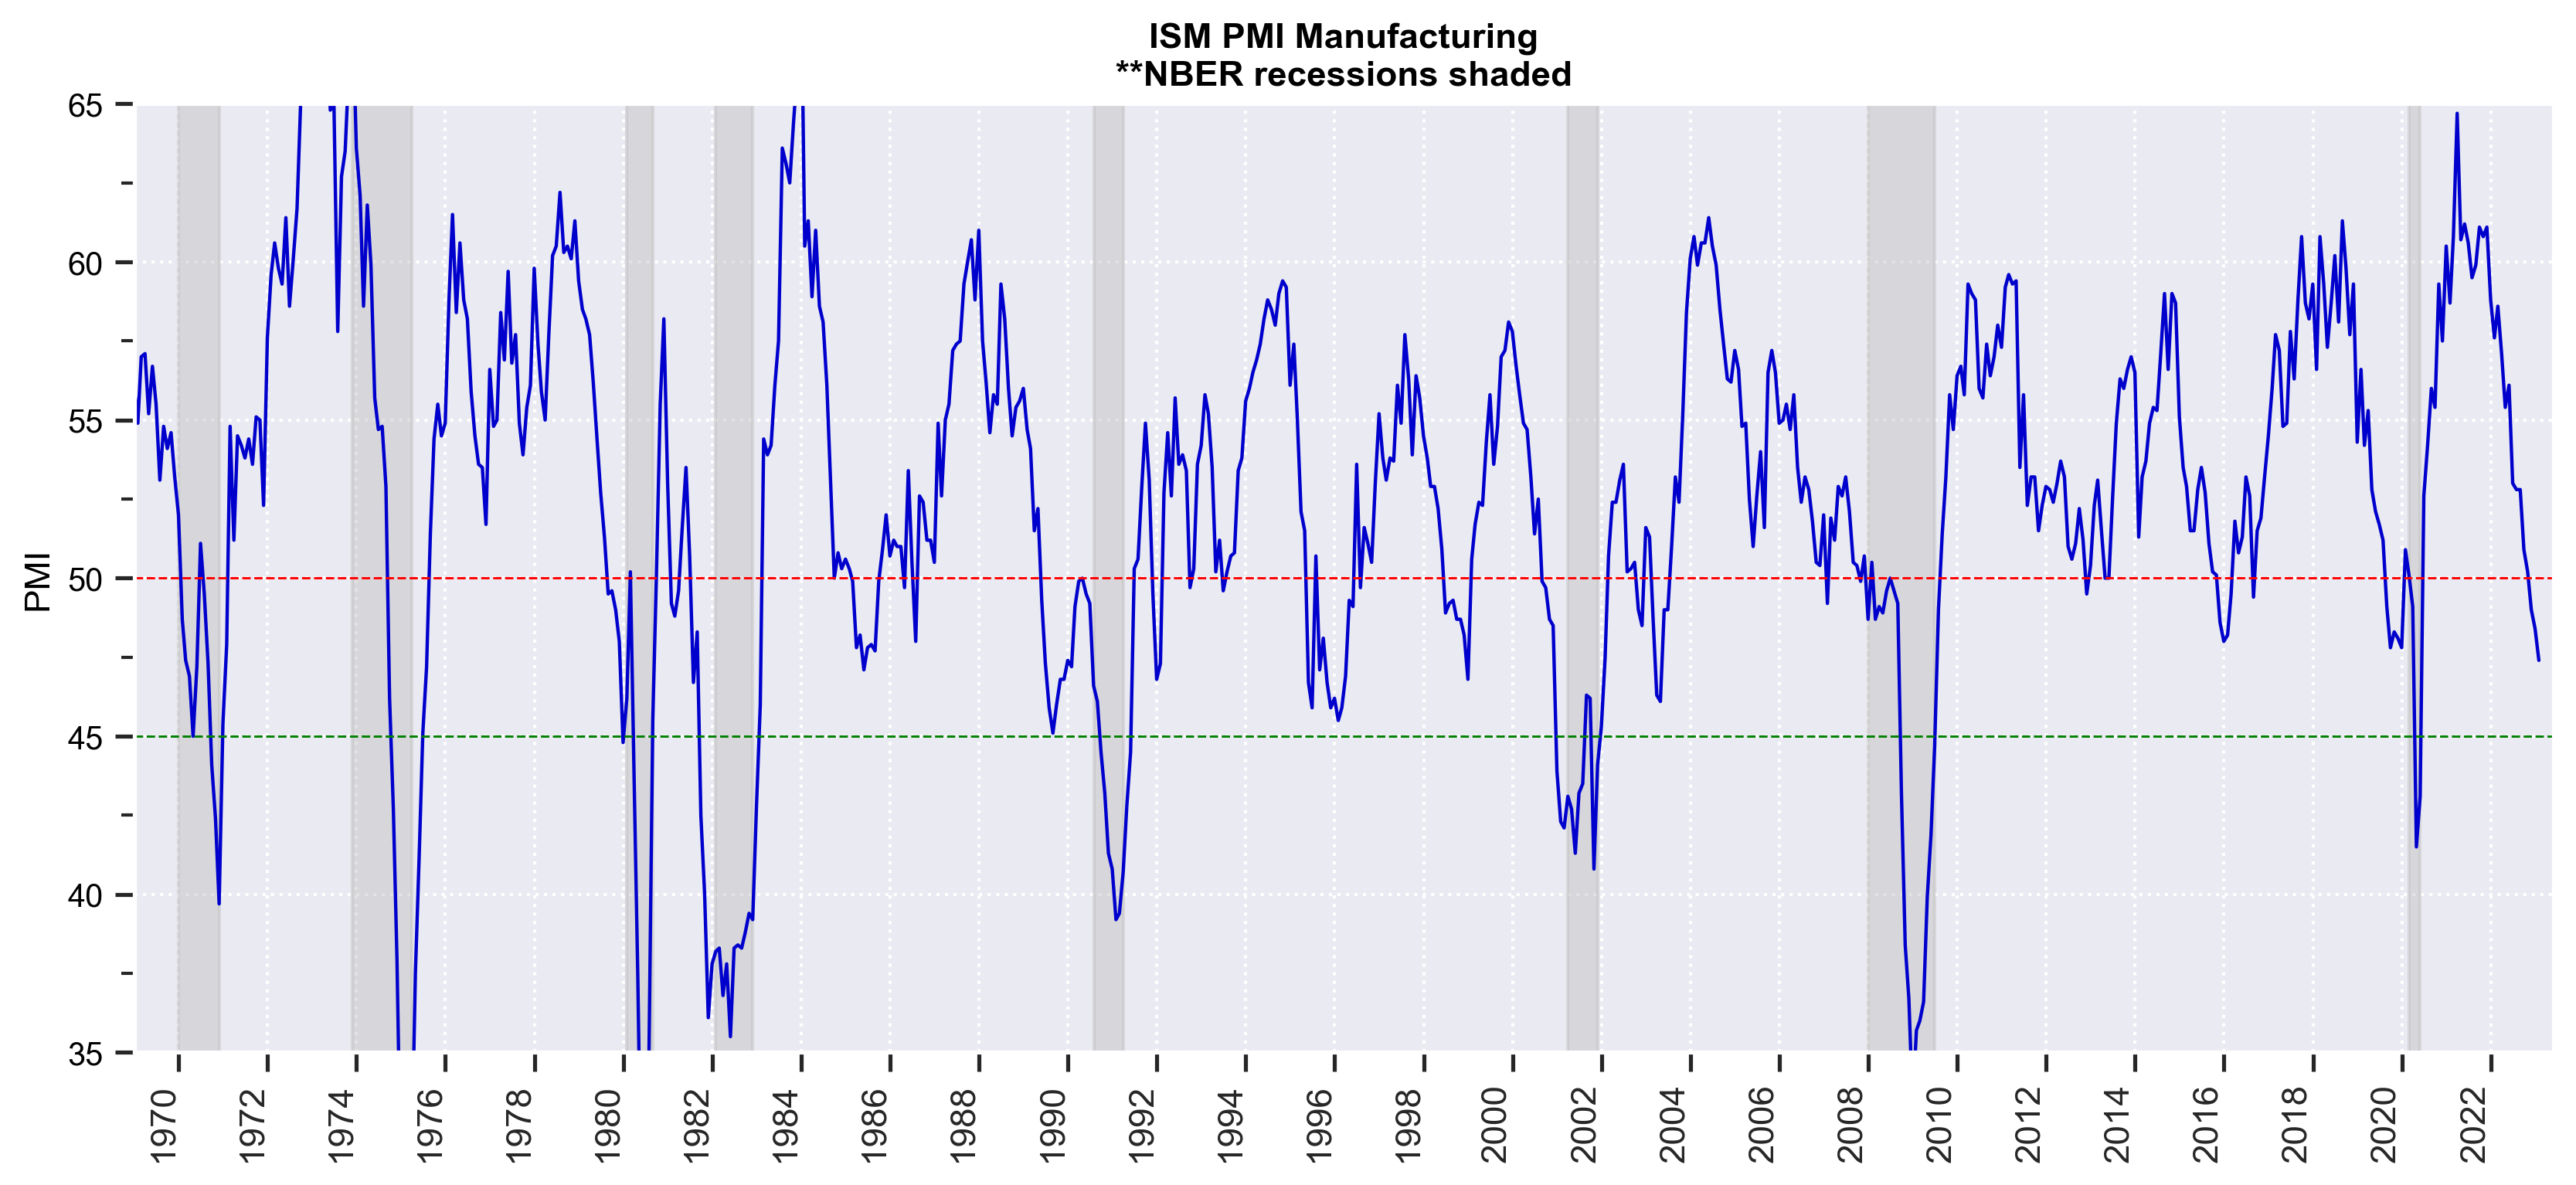

In [24]:
# Create the plot figure
fig, ax = plt.subplots(figsize = (11, 5), dpi=300)
plt.rcParams['figure.constrained_layout.use'] = True # automatically adjusts and fit layout 
#plt.margins(0, 0.05) # manually fit x and y series inside plot area, or use autoscaling bellow. 
plt.autoscale(enable=None, axis="x", tight=True)

sns.set_theme(style = "darkgrid", font='sans-serif') # setting grid style with seaborn

font = {'family':'sans-serif',
        'name': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 11,
        }

# Plot the PMI values on the left y-axis
color = 'red'
ax.set_ylabel('PMI', color='black', fontdict = font)
ax.plot(PMI['Date'], PMI['Value'], c='mediumblue', lw=1.05) # plot data
ax.set_xlim([dt.datetime(1968, 12, 31), dt.datetime(2023, 6, 1)]) # set x-axis view range 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format x-axis dates (%d-%m-%Y)
ax.xaxis.set_ticks_position('bottom') # x-axis tick positions
ax.xaxis.set_major_locator(mdates.YearLocator(2)) # x-axis tick label interval
# rotate and right-align x-axis labels so they don't crowd each other. which = major (select major ticks)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90, horizontalalignment='right')
ax.grid(linestyle=':', linewidth=1) # style grid

# set params for left y-axis
ax.set_ylim(35, 65) # set y-axis view range
ax.tick_params(axis='y', labelcolor='black', labelsize='small') # format tick style
ax.yaxis.set_major_locator(ticker.MultipleLocator(5)) # major tick position
ax.yaxis.set_minor_locator(ticker.MultipleLocator(2.5)) # minor tick position
ax.yaxis.set_ticks_position('left') # tick placement
ax.axhline(y = 45, color = 'green', lw=0.7, linestyle = '--') # add zero line
ax.axhline(y = 50, color = 'red', lw=0.7, linestyle = '--') # add zero line

plt.axvspan(dt.datetime(2020,3,1), dt.datetime(2020,5,31), alpha=0.45, color='silver') # add recession period
plt.axvspan(dt.datetime(2008,1,1), dt.datetime(2009,7,1), alpha=0.45, color='silver') # add recession period
plt.axvspan(dt.datetime(2001,4,1), dt.datetime(2001,12,1), alpha=0.45, color='silver') # add recession period
plt.axvspan(dt.datetime(1990,8,1), dt.datetime(1991,4,1), alpha=0.45, color='silver') # add recession period
plt.axvspan(dt.datetime(1982,1,31), dt.datetime(1982,12,1), alpha=0.45, color='silver') # add recession period
plt.axvspan(dt.datetime(1980,1,31), dt.datetime(1980,8,31), alpha=0.45, color='silver') # add recession period
plt.axvspan(dt.datetime(1973,12,1), dt.datetime(1975,4,1), alpha=0.45, color='silver') # add recession period
plt.axvspan(dt.datetime(1970,1,1), dt.datetime(1970,12,1), alpha=0.45, color='silver') # add recession period

plt.title("ISM PMI Manufacturing\n**NBER recessions shaded", loc='center', weight='bold', fontdict=font)

# show the plot
plt.show();


#### Plot ISM PMI Manufacturing vs. ISM NewOrders/Inventories Ratio

ISM Manufacturing New Orders to Inventories ratio has a lead over the ISM Composite Manufacturing. This ratio is suggesting further downside for the Composite.

In [37]:
# get "ISM Manufacturing PMI New Orders" subcomponent and set 'Date' to pandas.datetime
NO = get_df_from_csv('US ISM Manufacturing New Orders Index (YCharts)')
NO['Date'] = pd.to_datetime(NO.Date)
# get "ISM Manufacturing PMI Inventories" subcomponent and set 'Date' to pandas.datetime
INV = get_df_from_csv('US ISM Manufacturing Inventories Index (YCharts)')
INV['Date'] = pd.to_datetime(INV.Date)

In [41]:
# merge dataframes across 'Date' columns
mult_df = pd.merge(NO, INV, on='Date')
# get ratio od new orders to inventories
mult_df['ratio'] = mult_df['Value_x'] / mult_df['Value_y']
mult_df

,Date,Value_x,Value_y,ratio
0,2023-01-31,42.5,50.2,0.846614
1,2022-12-31,45.1,52.3,0.862333
2,2022-11-30,47.2,50.9,0.927308
3,2022-10-31,49.2,52.5,0.937143
4,2022-09-30,47.1,55.5,0.848649
...,...,...,...,...
745,1960-12-31,47.5,39.3,1.208651
746,1960-11-30,48.2,41.7,1.155875
747,1960-10-31,50.1,39.7,1.261965
748,1960-09-30,50.5,40.8,1.237745


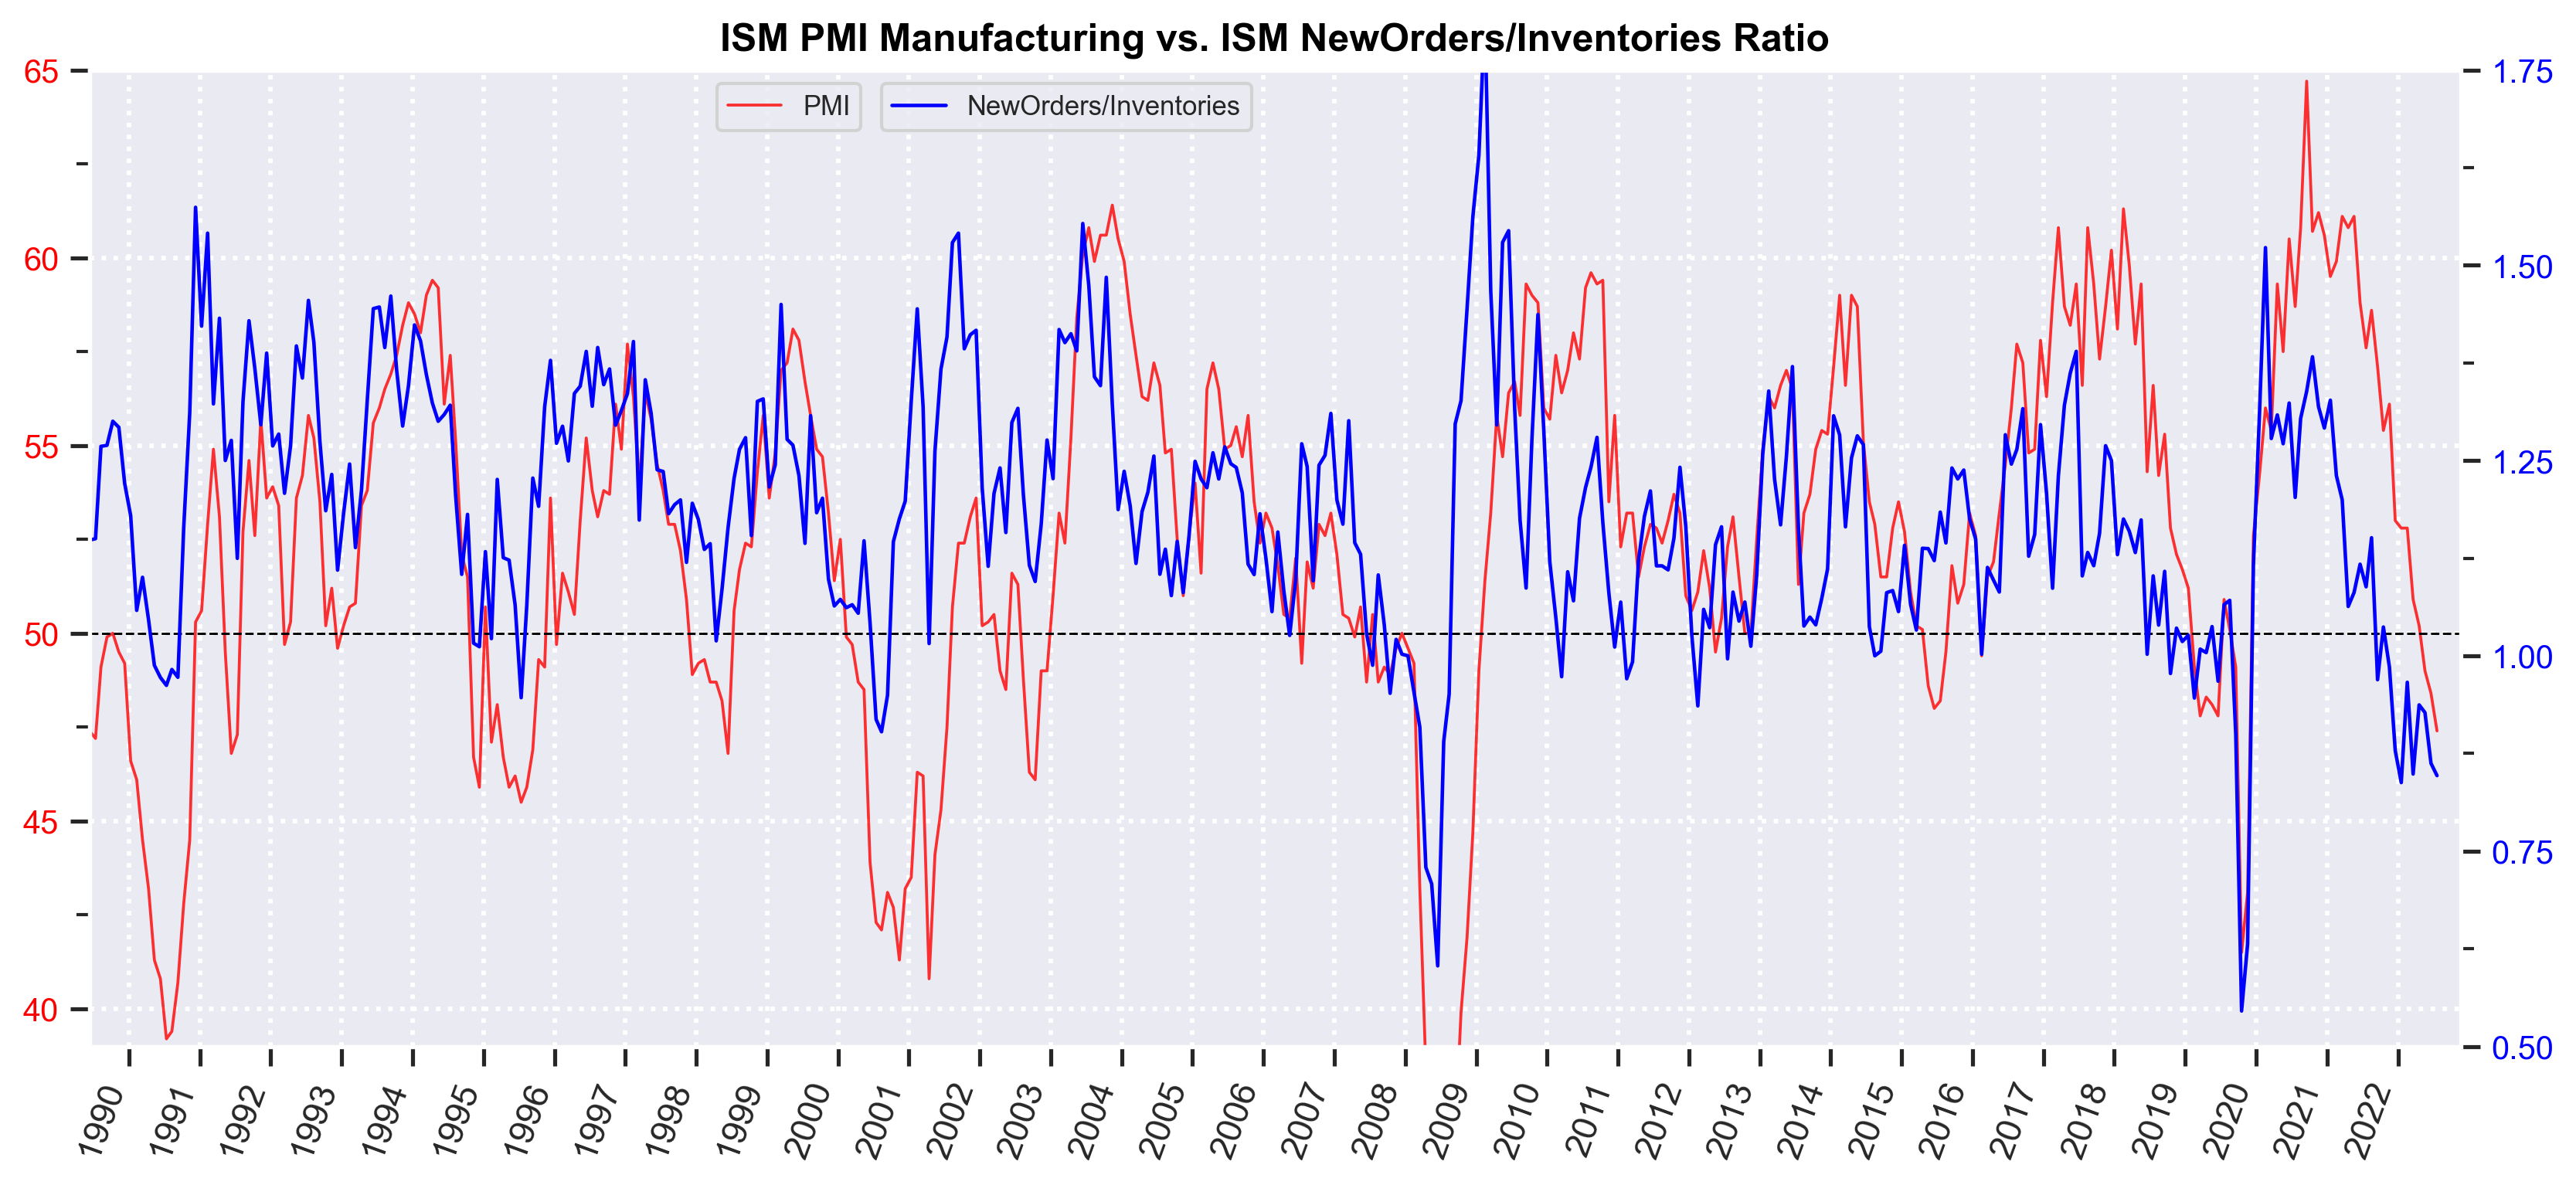

In [60]:
# plot ISM Manufacturing vs. NewOrders to Inventoris ratio
fig, ax1 = plt.subplots(figsize = (11, 5), dpi=300)
plt.rcParams['figure.constrained_layout.use'] = True # automatically adjusts and fit layout 
#plt.margins(0, 0.05) # manually fit x and y series inside plot area, or use autoscaling bellow. 
plt.autoscale(enable=None, axis="x", tight=True)

sns.set_theme(style = "darkgrid", font='sans-serif') # setting grid style with seaborn

font = {'family': 'sans-serif',
        'name': 'arial',
        'color': 'black',
        'weight': 'normal',
        'size': 12,
        }

# Plot the PMI values on the left y-axis
color = 'red'
ax1.plot(PMI['Date'], PMI['Value'], c='red', lw=0.9, alpha=0.8) # plot data
ax1.set_xlim([dt.datetime(1989, 12, 31), dt.datetime(2023, 6, 1)]) # set x-axis view range 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format x-axis dates (%d-%m-%Y)
ax1.xaxis.set_ticks_position('bottom') # x-axis tick positions
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=365)) # x-axis tick label interval
# rotate and right-align x-axis labels so they don't crowd each other. which = major (select major ticks)
for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=70, horizontalalignment='right')
ax1.grid(linestyle=':', linewidth=1.4) # style grid

# set params for left y-axis
ax1.set_ylim(39, 65) # set y-axis view range
ax1.tick_params(axis='y', labelcolor=color, labelsize='small') # format tick style
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5)) # major tick position
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5)) # minor tick position
ax1.yaxis.set_ticks_position('left') # tick placement
# bbox_to_anchor : specific position of the legend (x, y, width, height)
ax1.legend(['PMI'], loc='upper center', fontsize='x-small', bbox_to_anchor=(0.295, 0, 0, 1))
ax1.axhline(y = 50, color = 'black', lw=0.7, linestyle = '--') 

# Create a twin y-axis for the SPX return values on the right side
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylim(0.5, 1.75) # set y-axis view range
ax2.plot(mult_df['Date'], mult_df['ratio'], color=color, lw=1.1, alpha=1) # plot series
ax2.yaxis.grid(False) # remove second grid 

# set params for second/right y-axis
ax2.tick_params(axis='y', labelcolor=color, labelsize='small') # format tick style
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.25)) # major tick position
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.125)) # minor tick position
ax2.yaxis.set_ticks_position('right') # tick placement

ax2.legend(['NewOrders/Inventories'], loc='upper center', fontsize='x-small', bbox_to_anchor=(0.412, 0, 0, 1))

plt.title("ISM PMI Manufacturing vs. ISM NewOrders/Inventories Ratio", loc='center', fontdict=font, weight='bold')

# show the plot
plt.show();
